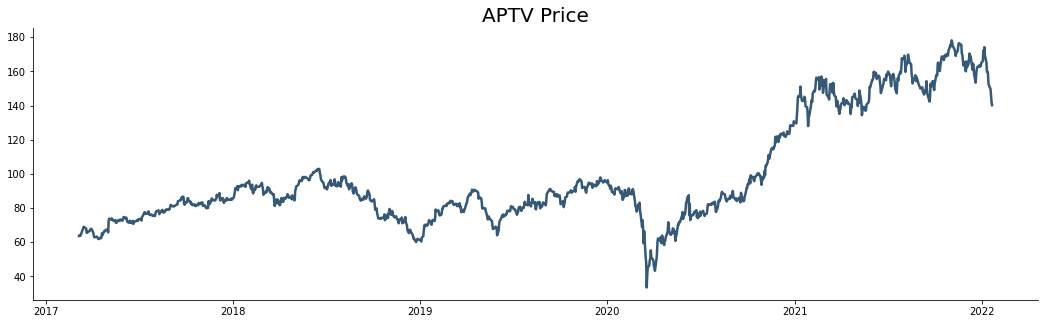

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('APTV.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('APTV Price', size=20)
plt.plot(df);

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [3]:
df

,APTV
Date,
2017-03-06,63.64
2017-03-07,63.68
2017-03-08,64.23
2017-03-09,63.95
2017-03-10,64.62
...,...
2022-01-14,152.60
2022-01-18,149.56
2022-01-19,145.88


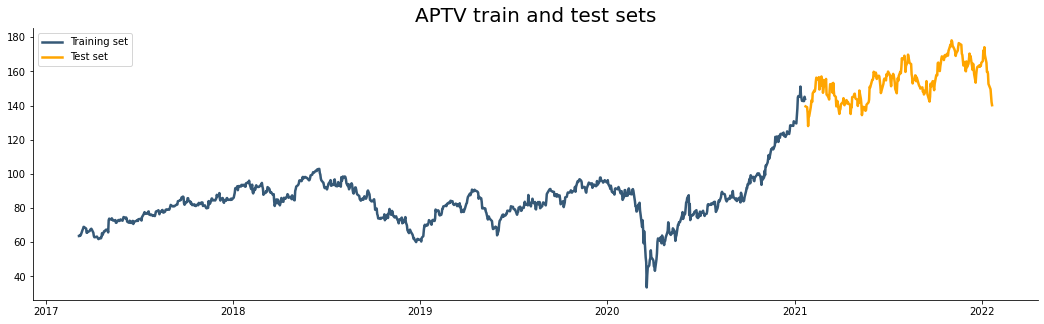

In [4]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('APTV train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [5]:
from fbprophet import Prophet as proph

In [6]:
df_train

,APTV
Date,
2017-03-06,63.64
2017-03-07,63.68
2017-03-08,64.23
2017-03-09,63.95
2017-03-10,64.62
...,...
2021-01-14,144.22
2021-01-15,142.75
2021-01-19,142.57


In [7]:
df_train.reset_index(inplace=True)

In [8]:
df_test

,APTV
Date,
2021-01-22,139.49
2021-01-25,139.01
2021-01-26,135.70
2021-01-27,127.96
2021-01-28,133.42
...,...
2022-01-14,152.60
2022-01-18,149.56
2022-01-19,145.88


In [9]:
df_test.reset_index(inplace=True)

In [10]:
# Rename the columns [Date,AAPL] to [ds, y]

ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'APTV': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'APTV': 'y'})
ts.head(5)


,ds,y
0,2017-03-06,63.64
1,2017-03-07,63.68
2,2017-03-08,64.23
3,2017-03-09,63.95
4,2017-03-10,64.62


In [11]:
x_test = ts_test[['ds']]

In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)

In [13]:
# Fit the timeseries into Model
Model.fit(ts)

In [14]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()


,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [15]:
future_dates

,ds
0,2017-03-06
1,2017-03-07
2,2017-03-08
3,2017-03-09
4,2017-03-10
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [16]:
future_dates= future_dates.loc[future_dates['ds'] >= '2021-01-22']

In [17]:
x_test = pd.DataFrame(x_test)

In [18]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [19]:
# Predict the values for future dates and take the head of forecast

predicitons = Model.predict(x_test)


In [20]:
forecast = Model.predict(future_dates)

In [21]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
754,2023-02-15,323.499583,60.693260,636.631915,45.329187,629.732587,10.009257,10.009257,10.009257,0.325616,...,0.071020,0.071020,0.071020,9.612621,9.612621,9.612621,0.0,0.0,0.0,333.508840
755,2023-02-16,323.755543,53.118272,643.947700,45.074925,630.353756,10.162359,10.162359,10.162359,0.325616,...,-0.000339,-0.000339,-0.000339,9.837082,9.837082,9.837082,0.0,0.0,0.0,333.917902
756,2023-02-17,324.011503,54.491244,639.355615,44.820663,630.974925,10.247090,10.247090,10.247090,0.325616,...,-0.118280,-0.118280,-0.118280,10.039753,10.039753,10.039753,0.0,0.0,0.0,334.258592
757,2023-02-18,324.267463,51.469739,641.896410,44.566400,631.596093,10.498605,10.498605,10.498605,0.325616,...,-0.040702,-0.040702,-0.040702,10.213691,10.213691,10.213691,0.0,0.0,0.0,334.766068
758,2023-02-19,324.523423,55.443447,647.019601,44.312138,632.217262,10.637167,10.637167,10.637167,0.325616,...,-0.040702,-0.040702,-0.040702,10.352252,10.352252,10.352252,0.0,0.0,0.0,335.160589


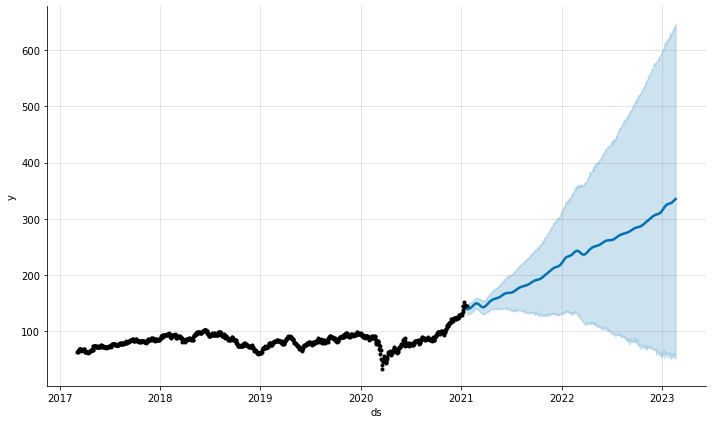

In [22]:
# Use prophet's plot function to plot the predictions

Model.plot(forecast, uncertainty=True)
plt.show()

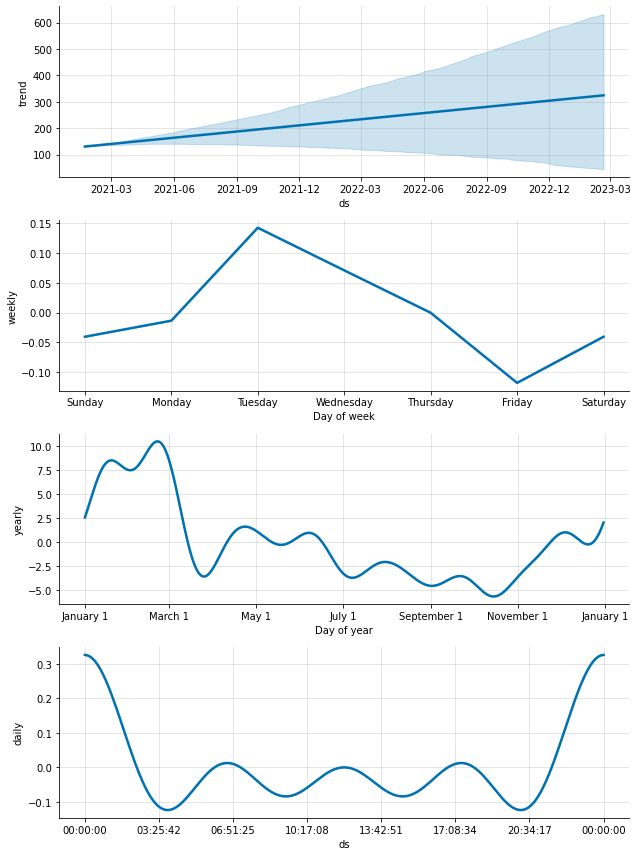

In [23]:
Model.plot_components(forecast)
plt.show()

In [24]:
df_test = pd.concat([df_test,predicitons], axis=1)
df_test

,Date,APTV,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,139.49,2021-01-22,130.505764,129.507152,149.101125,130.505764,130.505764,8.641063,8.641063,...,-0.118280,-0.118280,-0.118280,8.433727,8.433727,8.433727,0.0,0.0,0.0,139.146827
1,2021-01-25,139.01,2021-01-25,131.273644,130.383612,148.871893,131.237136,131.307511,8.452206,8.452206,...,-0.013674,-0.013674,-0.013674,8.140264,8.140264,8.140264,0.0,0.0,0.0,139.725850
2,2021-01-26,135.70,2021-01-26,131.529604,131.299775,148.661345,131.458834,131.606405,8.490158,8.490158,...,0.142678,0.142678,0.142678,8.021864,8.021864,8.021864,0.0,0.0,0.0,140.019762
3,2021-01-27,127.96,2021-01-27,131.785564,130.122322,148.606710,131.681200,131.925242,8.299873,8.299873,...,0.071020,0.071020,0.071020,7.903237,7.903237,7.903237,0.0,0.0,0.0,140.085437
4,2021-01-28,133.42,2021-01-28,132.041524,131.508548,149.882608,131.896894,132.244416,8.115603,8.115603,...,-0.000339,-0.000339,-0.000339,7.790326,7.790326,7.790326,0.0,0.0,0.0,140.157127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,152.60,2022-01-14,221.883474,132.417704,338.862318,125.209358,331.156336,8.040901,8.040901,...,-0.118280,-0.118280,-0.118280,7.833564,7.833564,7.833564,0.0,0.0,0.0,229.924375
249,2022-01-18,149.56,2022-01-18,222.907314,130.812649,342.117693,124.145669,333.858815,8.926993,8.926993,...,0.142678,0.142678,0.142678,8.458699,8.458699,8.458699,0.0,0.0,0.0,231.834307
250,2022-01-19,145.88,2022-01-19,223.163274,135.600348,346.841390,123.962393,334.534435,8.906367,8.906367,...,0.071020,0.071020,0.071020,8.509731,8.509731,8.509731,0.0,0.0,0.0,232.069640
251,2022-01-20,142.00,2022-01-20,223.419234,131.411309,346.055780,123.779117,335.210055,8.848157,8.848157,...,-0.000339,-0.000339,-0.000339,8.522879,8.522879,8.522879,0.0,0.0,0.0,232.267390


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,130.505764,128.800215,147.559514,130.505764,130.505764,8.641063,8.641063,8.641063,0.325616,...,-0.118280,-0.118280,-0.118280,8.433727,8.433727,8.433727,0.0,0.0,0.0,139.146827
1,2021-01-23,130.761724,130.689252,149.301909,130.761724,130.761724,8.637058,8.637058,8.637058,0.325616,...,-0.040702,-0.040702,-0.040702,8.352144,8.352144,8.352144,0.0,0.0,0.0,139.398782
2,2021-01-24,131.017684,130.271778,148.554155,131.017594,131.017684,8.537284,8.537284,8.537284,0.325616,...,-0.040702,-0.040702,-0.040702,8.252370,8.252370,8.252370,0.0,0.0,0.0,139.554968
3,2021-01-25,131.273644,130.232618,148.874500,131.258834,131.281924,8.452206,8.452206,8.452206,0.325616,...,-0.013674,-0.013674,-0.013674,8.140264,8.140264,8.140264,0.0,0.0,0.0,139.725850
4,2021-01-26,131.529604,131.104026,149.799671,131.493908,131.575664,8.490158,8.490158,8.490158,0.325616,...,0.142678,0.142678,0.142678,8.021864,8.021864,8.021864,0.0,0.0,0.0,140.019762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2023-02-15,323.499583,60.693260,636.631915,45.329187,629.732587,10.009257,10.009257,10.009257,0.325616,...,0.071020,0.071020,0.071020,9.612621,9.612621,9.612621,0.0,0.0,0.0,333.508840
755,2023-02-16,323.755543,53.118272,643.947700,45.074925,630.353756,10.162359,10.162359,10.162359,0.325616,...,-0.000339,-0.000339,-0.000339,9.837082,9.837082,9.837082,0.0,0.0,0.0,333.917902
756,2023-02-17,324.011503,54.491244,639.355615,44.820663,630.974925,10.247090,10.247090,10.247090,0.325616,...,-0.118280,-0.118280,-0.118280,10.039753,10.039753,10.039753,0.0,0.0,0.0,334.258592
757,2023-02-18,324.267463,51.469739,641.896410,44.566400,631.596093,10.498605,10.498605,10.498605,0.325616,...,-0.040702,-0.040702,-0.040702,10.213691,10.213691,10.213691,0.0,0.0,0.0,334.766068


In [26]:
mean_squared_error(df_test.APTV,df_test.yhat,squared=False)

30.39091506232456

In [27]:
ROI = (140.19/324.523423)*100
ROI

43.198730835524316

# Concating APTV DF

In [28]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

,ds,yhat
372,2022-01-29,233.720606
373,2022-01-30,233.887049
374,2022-01-31,234.100731
375,2022-02-01,234.468143
376,2022-02-02,234.635383
...,...,...
754,2023-02-15,333.508840
755,2023-02-16,333.917902
756,2023-02-17,334.258592
757,2023-02-18,334.766068


In [29]:
concat_df.set_index('ds',inplace=True)

In [30]:
concat_df

,yhat
ds,
2022-01-29,233.720606
2022-01-30,233.887049
2022-01-31,234.100731
2022-02-01,234.468143
2022-02-02,234.635383
...,...
2023-02-15,333.508840
2023-02-16,333.917902
2023-02-17,334.258592


In [31]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [32]:
concat_df.columns = ['y']

In [33]:
df_test

,Date,APTV,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,139.49,2021-01-22,130.505764,129.507152,149.101125,130.505764,130.505764,8.641063,8.641063,...,-0.118280,-0.118280,-0.118280,8.433727,8.433727,8.433727,0.0,0.0,0.0,139.146827
1,2021-01-25,139.01,2021-01-25,131.273644,130.383612,148.871893,131.237136,131.307511,8.452206,8.452206,...,-0.013674,-0.013674,-0.013674,8.140264,8.140264,8.140264,0.0,0.0,0.0,139.725850
2,2021-01-26,135.70,2021-01-26,131.529604,131.299775,148.661345,131.458834,131.606405,8.490158,8.490158,...,0.142678,0.142678,0.142678,8.021864,8.021864,8.021864,0.0,0.0,0.0,140.019762
3,2021-01-27,127.96,2021-01-27,131.785564,130.122322,148.606710,131.681200,131.925242,8.299873,8.299873,...,0.071020,0.071020,0.071020,7.903237,7.903237,7.903237,0.0,0.0,0.0,140.085437
4,2021-01-28,133.42,2021-01-28,132.041524,131.508548,149.882608,131.896894,132.244416,8.115603,8.115603,...,-0.000339,-0.000339,-0.000339,7.790326,7.790326,7.790326,0.0,0.0,0.0,140.157127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,152.60,2022-01-14,221.883474,132.417704,338.862318,125.209358,331.156336,8.040901,8.040901,...,-0.118280,-0.118280,-0.118280,7.833564,7.833564,7.833564,0.0,0.0,0.0,229.924375
249,2022-01-18,149.56,2022-01-18,222.907314,130.812649,342.117693,124.145669,333.858815,8.926993,8.926993,...,0.142678,0.142678,0.142678,8.458699,8.458699,8.458699,0.0,0.0,0.0,231.834307
250,2022-01-19,145.88,2022-01-19,223.163274,135.600348,346.841390,123.962393,334.534435,8.906367,8.906367,...,0.071020,0.071020,0.071020,8.509731,8.509731,8.509731,0.0,0.0,0.0,232.069640
251,2022-01-20,142.00,2022-01-20,223.419234,131.411309,346.055780,123.779117,335.210055,8.848157,8.848157,...,-0.000339,-0.000339,-0.000339,8.522879,8.522879,8.522879,0.0,0.0,0.0,232.267390


In [35]:
df2 = df_test[['Date','APTV']]

In [36]:
df2.set_index('Date',inplace=True)

In [37]:
temp_ds = ts.set_index('ds')

In [38]:
df2.columns = ['y']

In [39]:
final_df= pd.concat([temp_ds,df2,concat_df])
final_df

,y
2017-03-06,63.640000
2017-03-07,63.680000
2017-03-08,64.230000
2017-03-09,63.950000
2017-03-10,64.620000
...,...
2023-02-15,333.508840
2023-02-16,333.917902
2023-02-17,334.258592
2023-02-18,334.766068


In [40]:
final_df.to_csv('AAPTV_final.csv')

In [42]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

concat_df.set_index('ds',inplace=True)

concat_df

concat_df.info()

concat_df.columns = ['y']

df_test

df2 = df_test[['Date','APTV']]

df2.set_index('Date',inplace=True)

temp_ds = ts.set_index('ds')

df2.columns = ['y']

final_df= pd.concat([temp_ds,df2,concat_df])
final_df

final_df.to_csv('APTV_final.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB
